# **Ujian Hands-On: Data Science Trainee Jakarta Smart City**

## **Image Classification Deployment: Intel Image Classification Dataset**
### by Hanzalah Assidiq

## **Import Library**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import warnings
import zipfile,os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input

## **Import Dataset**

In [ ]:
!pip install -q Kaggle

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

 97% 337M/346M [00:02<00:00, 166MB/s]
100% 346M/346M [00:02<00:00, 173MB/s]


In [ ]:
from zipfile import ZipFile
file_name = '/content/intel-image-classification.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('DONE')

DONE


In [ ]:
train_dir='/content/seg_train/seg_train'
validation_dir='/content/seg_test/seg_test'

## **Images Augmentation**

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(150, 150),
  batch_size=32)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.


In [ ]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
  validation_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(150, 150),
  batch_size=32)

Found 3000 files belonging to 6 classes.
Using 600 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


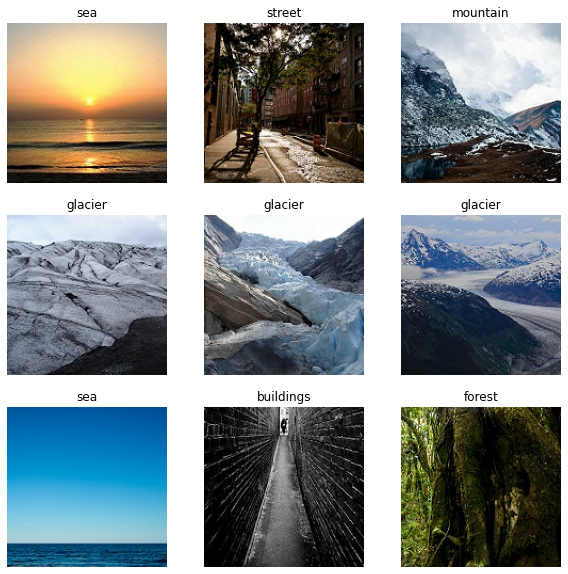

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## **Modelling**

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(150, 150, 3)),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(6,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 37, 37, 64)       

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nSelamat akurasi model telah mencapai > 90% !")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
hist = model.fit(
  train_ds,
  validation_data=validation_ds,
  validation_steps=5,
  verbose=2,
  epochs=10,
  #callbacks=[callbacks]
)

Epoch 1/10
351/351 - 15s - loss: 1.0875 - accuracy: 0.5670 - val_loss: 0.9011 - val_accuracy: 0.5750 - 15s/epoch - 42ms/step
Epoch 2/10
351/351 - 14s - loss: 0.8112 - accuracy: 0.6885 - val_loss: 0.7463 - val_accuracy: 0.7125 - 14s/epoch - 41ms/step
Epoch 3/10
351/351 - 15s - loss: 0.6649 - accuracy: 0.7556 - val_loss: 0.6879 - val_accuracy: 0.7250 - 15s/epoch - 41ms/step
Epoch 4/10
351/351 - 14s - loss: 0.5628 - accuracy: 0.7985 - val_loss: 0.5189 - val_accuracy: 0.8125 - 14s/epoch - 41ms/step
Epoch 5/10
351/351 - 14s - loss: 0.4790 - accuracy: 0.8270 - val_loss: 0.6548 - val_accuracy: 0.7500 - 14s/epoch - 40ms/step
Epoch 6/10
351/351 - 14s - loss: 0.4000 - accuracy: 0.8550 - val_loss: 0.4953 - val_accuracy: 0.8313 - 14s/epoch - 40ms/step
Epoch 7/10
351/351 - 14s - loss: 0.3316 - accuracy: 0.8799 - val_loss: 0.5502 - val_accuracy: 0.7875 - 14s/epoch - 40ms/step
Epoch 8/10
351/351 - 14s - loss: 0.2648 - accuracy: 0.9049 - val_loss: 0.4872 - val_accuracy: 0.8000 - 14s/epoch - 40ms/step


## **Plotting The Accuracy and Loss Model**

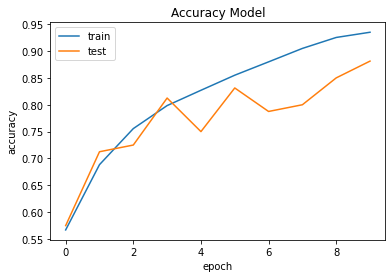

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

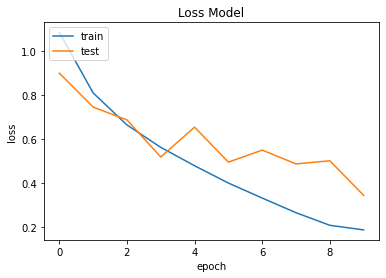

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Deployment to Gradio**

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 KB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 71.1 MB/s eta 0:00:00
  Preparing meta

In [ ]:
import gradio as gr

def predict_image(img):
  img_4d=img.reshape(-1,150,150,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(6)}

image = gr.inputs.Image(shape=(150,150))
label = gr.outputs.Label(num_top_classes=6)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 18ms/step
Keyboard interruption in main thread... closing server.
